In [4]:
"""
Using GeoPandas to generate a vector mask and applying it to a raster image.

Kelsey Jordahl
SciPy tutorial 2015

** modified by sigon 2019

"""

import rasterio
from rasterio.features import rasterize, Affine
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt


In [5]:
mars_data = gpd.read_file("./geology/SIM3292_Shapefiles/SIM3292_Global_Geology.shp")
#mars_data = gpd.read_file("/Applications/GPlates-2.2.0/SampleData/FeatureCollections/ContinentalPolygons/Shapefile/Matthews_etal_GPC_2016_ContinentalPolygons.shp")
# original data

#mars_data = mars_data.loc[:,['OBJECTID','Unit','geometry']]

mars_data


,OBJECTID,Shape_Leng,Shape_Area,Unit,UnitDesc,SphArea_km,geometry
0,1,1.004969e+07,4.450246e+11,lApc,Late Amazonian polar cap unit,103642.00,"POLYGON ((-56.63683 -84.72985, -56.63235 -84.7..."
1,2,1.357599e+06,3.214948e+10,Hpe,Hesperian polar edifice unit,15347.10,"POLYGON ((21.93653 -80.13496, 21.96328 -80.135..."
2,3,2.575993e+06,7.040982e+10,Hp,Hesperian polar unit,33723.60,"POLYGON ((-36.84076 -79.79726, -36.83184 -79.7..."
3,4,6.740798e+05,1.191163e+10,Hpe,Hesperian polar edifice unit,6217.34,"POLYGON ((-20.70137 -77.96855, -20.68342 -77.9..."
4,5,4.154933e+06,1.652814e+11,Hp,Hesperian polar unit,83363.70,"POLYGON ((94.18004 -77.14730, 94.18898 -77.147..."
...,...,...,...,...,...,...,...
1306,1307,5.519816e+06,2.300772e+11,lApd,Late Amazonian polar dunes unit,113208.00,"POLYGON ((-140.59339 82.33500, -140.21547 82.2..."
1307,1308,3.677311e+06,7.461851e+10,Hpu,Hesperian polar undivided unit,34509.90,"POLYGON ((-22.49941 84.94328, -21.56607 84.940..."
1308,1309,1.850125e+07,6.258272e+11,Apu,Amazonian polar undivided unit,299370.00,"POLYGON ((179.99907 85.33254, 179.99940 84.961..."
1309,1310,9.681803e+06,2.911192e+11,Apu,Amazonian polar undivided unit,130273.00,"POLYGON ((-148.25176 84.42084, -148.23829 84.4..."


<AxesSubplot:>

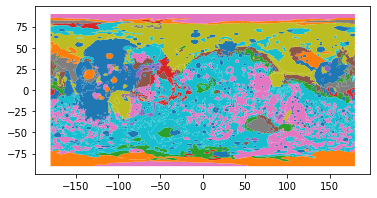

In [6]:
#list(mars_data.Unit.unique())
mars_data.plot(column='Unit')

In [7]:
#raster_file = './DistanceToHellasCentre.nc'
raster_file = '/Applications/GPlates-2.2.0/SampleData/Rasters/Seafloor_Age_Grid/EarthByte_AREPS_Muller_etal_2016_AgeGrid.nc'

mars_data.crs

<Geographic 2D CRS: GEOGCS["GCS_Mars_2000_Sphere",DATUM["Mars_2000_(Sp ...>
Name: GCS_Mars_2000_Sphere
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Mars_2000_(Sphere)
- Ellipsoid: Mars_2000_Sphere_IAU_IAG
- Prime Meridian: Reference_Meridian

(720, 1440)


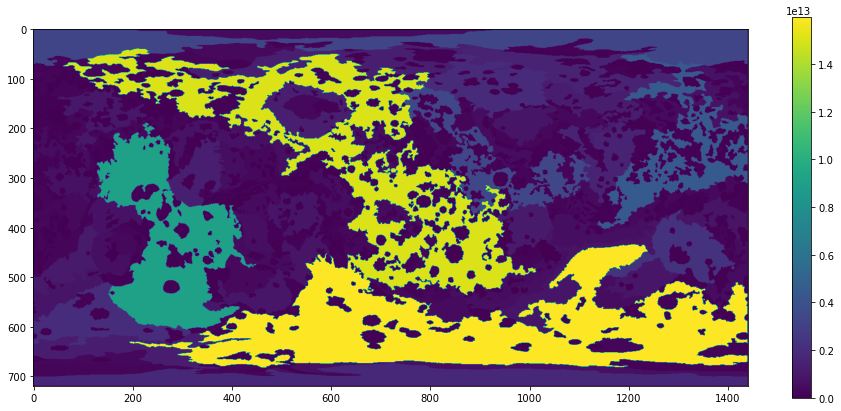

In [8]:
def show_img(img, bounds):
    left, bottom, right, top = bounds
    plt.imshow(img, cmap='gray', extent=(left, right, bottom, top))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

def doit(df, dims):
    
    sampling = dims[0]/180.
    
    transform = Affine(0.25, 0.0, -179.875, 0.0, 0.25, -89.875)
    
    geometry_zval_tuples = [(x.geometry, x.Shape_Area) for i, x in df.iterrows()]
    
    with rasterio.open(raster_file) as src:
        # iterate over features to get (geometry, id value) pairs
        mask = rasterize(
            geometry_zval_tuples,
            transform=transform,
            out_shape=dims)   #src.shape)

    # copy raster template metadata
    meta = src.meta.copy()
    meta.update(nodata=0, count=1, dtype=rasterio.uint8)
    
    return mask

# write mask as another 8-bit (rasterio.uint8) image (tif) by open in 'w' mode
#with rasterio.open(
#        './manhattan_mask_2.nc', 'w', # open in write mode
#        **meta) as dst:
#    dst.write(mask, indexes=1) # write band 1

result = doit(mars_data, (720,1440))

print(result.shape)

plt.figure(figsize=(16,7))
plt.imshow(result)
plt.colorbar()
plt.show()


(720, 1440)


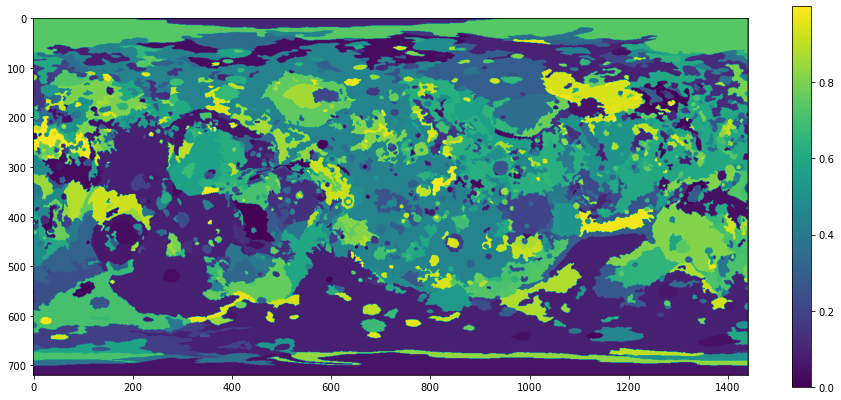

In [10]:
#transform = Affine(0.1, 0.0, -180.0, 0.0, 0.1, -90.0)

def doit(df, dims):
    
    sampling = dims[0]/180.
    
    transform = Affine(0.25, 0.0, -179.875, 0.0, 0.25, -89.875)
    
    geometry_zval_tuples = [(x.geometry, np.random.random_sample()) for i, x in df.iterrows()]
    
    with rasterio.open(raster_file) as src:
        # iterate over features to get (geometry, id value) pairs
        mask = rasterize(
            geometry_zval_tuples,
            transform=transform,
            out_shape=dims)   #src.shape)

    # copy raster template metadata
    meta = src.meta.copy()
    meta.update(nodata=0, count=1, dtype=rasterio.uint8)
    
    return mask

result = doit(mars_data, (720,1440))

print(result.shape)

plt.figure(figsize=(16,7))
plt.imshow(result)
plt.colorbar()
plt.show()
